# Online data

In [19]:
# load thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from datetime import datetime

In [20]:
# load dữ liệu
# !pip install yfinance

from datetime import datetime
import yfinance as yf

today = datetime.now()
year_ago = datetime(today.year - 1, today.month, today.day)

tickers = ["META", "AAPL", "MSFT", "NVDA", "VNM"]

obsers = []

for ticker in tickers:
    try:
        obsers.append(yf.download(ticker, start=year_ago, end = today))
    except:
        obsers.append("Ticker is not found!!!")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [21]:
obsers[0].columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [22]:
def vnd_to_usd(vnd):
    return vnd / 25422.50

# obsers[5]["Close"] = obsers[5]["Close"].apply(vnd_to_usd)
# obsers[5]["Open"] = obsers[5]["Open"].apply(vnd_to_usd)
# obsers[5]["High"] = obsers[5]["High"].apply(vnd_to_usd)
# obsers[5]["Low"] = obsers[5]["Low"].apply(vnd_to_usd)
# obsers[5]["Adj Close"] = obsers[5]["Adj Close"].apply(vnd_to_usd)
# obsers[5]["Volume"] = obsers[5]["Volume"].apply(vnd_to_usd)

# obsers[5].head()

In [23]:
def save_to_csv(data, filename):
    data.to_csv(filename)

# for i in range(len(tickers)):
#     save_to_csv(obsers[i], tickers[i] + ".csv")

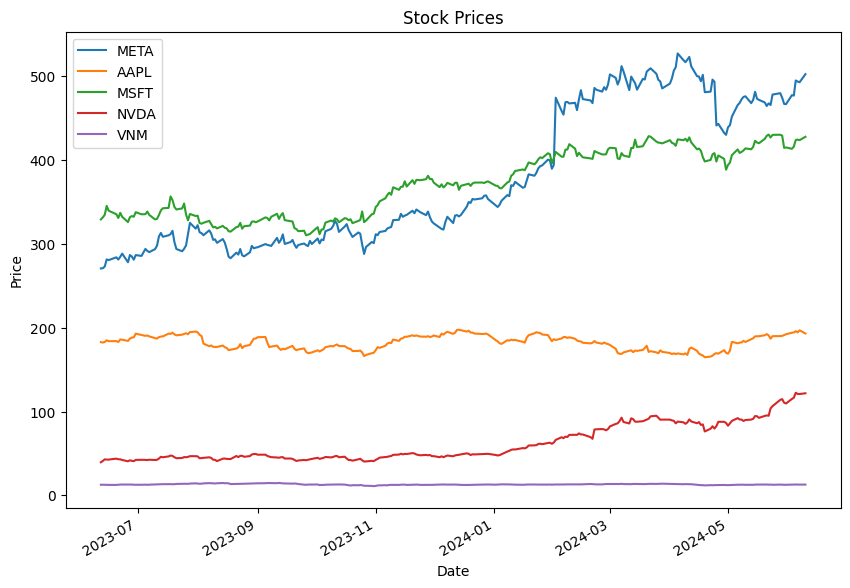

In [24]:
Adj_Close = pd.DataFrame()
for i in range(len(tickers)):
    Adj_Close[tickers[i]] = obsers[i]["Adj Close"]

Adj_Close.head()

Adj_Close.plot(figsize=(10, 7))
plt.title("Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

In [25]:
# Tính toán lợi nhuận
returns = Adj_Close.pct_change()
returns.head()
# Tính toán lợi nhuận trung bình
mean_returns = returns.mean()
mean_returns
std_returns = returns.std()
std_returns

# Tính toán ma trận hiệp phương sai
cov_matrix = returns.cov()
cov_matrix
# Tính toán ma trận hiệp phương sai
corr_matrix = returns.corr()
corr_matrix


,META,AAPL,MSFT,NVDA,VNM
META,1.000000,0.263909,0.533410,0.463188,0.147379
AAPL,0.263909,1.000000,0.446652,0.296612,0.130178
MSFT,0.533410,0.446652,1.000000,0.476641,0.200014
NVDA,0.463188,0.296612,0.476641,1.000000,0.237739
VNM,0.147379,0.130178,0.200014,0.237739,1.000000


# Moving Average

In [26]:
for i in range(len(tickers)):
    print("Mean of returns for", tickers[i], ":", mean_returns[tickers[i]])


Mean of returns for META : 0.002726748101789648
Mean of returns for AAPL : 0.0003007099427085014
Mean of returns for MSFT : 0.0011329468383450064
Mean of returns for NVDA : 0.004898733882947965
Mean of returns for VNM : 0.0001815217984739057


In [27]:
MA_day = [10, 20, 50]
#remove warning
def ploting_MA(obsers, tickers, MA_day, show = True):
    for i in range(len(obsers)):
        for day in MA_day:
            obsers[i][f"MA_{day}_{tickers[i]}"] = obsers[i]['Adj Close'].rolling(day).mean()
        if show:
            plt.figure(figsize=(15,6))
            sns.lineplot(x = "Date", y = f"MA_10_{tickers[i]}", data = obsers[i], label = "MA_10")
            sns.lineplot(x = "Date", y = f"MA_20_{tickers[i]}", data = obsers[i], label = "MA_20")
            sns.lineplot(x = "Date", y = f"MA_50_{tickers[i]}", data = obsers[i], label = "MA_50")
            plt.title("Moving Average")
            plt.legend()
            plt.show()

ploting_MA(obsers, tickers, MA_day, show = False)

# Monte Carlo du doan gia co phieu

In [28]:
META, AAPL, MSFT, NVDA, VNM = obsers

## Moving Average

In [29]:
for i in range(len(tickers)):
    print("Mean of returns for", tickers[i], "              :", mean_returns[tickers[i]])
    print("Standard deviation of returns for", tickers[i], ":", std_returns[tickers[i]])

Mean of returns for META               : 0.002726748101789648
Standard deviation of returns for META : 0.02273226823997409
Mean of returns for AAPL               : 0.0003007099427085014
Standard deviation of returns for AAPL : 0.012787887152941269
Mean of returns for MSFT               : 0.0011329468383450064
Standard deviation of returns for MSFT : 0.013030183063310087
Mean of returns for NVDA               : 0.004898733882947965
Standard deviation of returns for NVDA : 0.027927395419482973
Mean of returns for VNM               : 0.0001815217984739057
Standard deviation of returns for VNM : 0.015333230230233258


In [30]:
returns

,META,AAPL,MSFT,NVDA,VNM
Date,,,,,
2023-06-12,NaN,NaN,NaN,NaN,NaN
2023-06-13,0.000996,-0.002612,0.007353,0.039005,0.002252
2023-06-14,0.007482,0.003491,0.009124,0.048145,-0.008240
2023-06-15,0.031022,0.011199,0.031897,-0.008001,-0.005287
2023-06-16,-0.002945,-0.005860,-0.016576,0.000914,-0.003037
...,...,...,...,...,...
2024-06-04,-0.001047,0.001649,0.006167,0.012496,0.003127
2024-06-05,0.037883,0.007821,0.019083,0.051556,0.006235
2024-06-06,-0.002626,-0.007097,0.001203,-0.011777,-0.007746


In [31]:
# Phân bố của lợi nhuận hằng ngày
fig = go.Figure()
for i in returns.columns:
    fig.add_trace(go.Histogram(x=returns[i], name=i, marker=dict(color='#2E5D9D', line=dict(color='white', width=1))))

    fig.update_layout(
        title='Daily Return Histograms',
        xaxis_title='Daily Return',
        yaxis_title='Counts',
    )

fig.show()

In [32]:
MA_day = [10, 20, 50]
#remove warning
def ploting_MA(obsers, tickers, MA_day, show = True):
    for i in range(len(obsers)):
        for day in MA_day:
            obsers[i][f"MA_{day}_{tickers[i]}"] = obsers[i]['Adj Close'].rolling(day).mean()
        if show:
            fig = go.Figure()

            fig.add_trace(go.Scatter(x=obsers[i].index, y=obsers[i]['Adj Close'], mode='lines', name='Adj Close',hovertemplate="%{x}<br>Price: $%{y:.2f}"))
            fig.add_trace(go.Scatter(x=obsers[i].index, y=obsers[i][f'MA_10_{tickers[i]}'], mode='lines', name='MA_10',hovertemplate="%{x}<br>Price: $%{y:.2f}"))
            fig.add_trace(go.Scatter(x=obsers[i].index, y=obsers[i][f'MA_20_{tickers[i]}'], mode='lines', name='MA_20',hovertemplate="%{x}<br>Price: $%{y:.2f}"))
            fig.add_trace(go.Scatter(x=obsers[i].index, y=obsers[i][f'MA_50_{tickers[i]}'], mode='lines', name='MA_50',hovertemplate="%{x}<br>Price: $%{y:.2f}"))

            fig.update_layout(
                    title=f'{tickers[i]} - Moving Average',
                    xaxis_title="Date",
                    yaxis_title="Price (Adj Close)",
                    legend=dict(
                        orientation="h",
                        yanchor="top",
                        xanchor="center",
                        x=0.5
                    ),
                    showlegend=True,
                    plot_bgcolor='white',
                    xaxis=dict(
                        showgrid=True,
                        gridcolor='lightgray',
                    ),
                    yaxis=dict(
                        showgrid=True,
                        gridcolor='lightgray',
                    )
                )

            # Show the plot
            fig.show()
ploting_MA(obsers, tickers, MA_day)

In [33]:
META_xts = META["Adj Close"]
AAPL_xts = AAPL["Adj Close"]
MSFT_xts = MSFT["Adj Close"]
NVDA_xts = NVDA["Adj Close"]
VNM_xts = VNM["Adj Close"]


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MonteCarloSimulation:
    def __init__(self, data, no_of_days=120, no_of_sims=1001):
        self.data = data
        self.no_of_days = no_of_days
        self.no_of_sims = no_of_sims
        self.daily_returns = self.calculate_daily_returns()
        self.daily_mean = self.daily_returns.mean()
        self.daily_std_dev = self.daily_returns.std()
        self.starting_price = data.iloc[-1]
        self.prices_list = np.zeros((self.no_of_sims, self.no_of_days + 1))
        self.total_returns = np.empty(self.no_of_sims)
        
    def calculate_daily_returns(self):
        daily_returns = self.data.pct_change(-1).dropna()
        return daily_returns
    
    def run_simulation(self):
        for i in range(self.no_of_sims):
            returns = np.random.normal(loc=self.daily_mean, scale=self.daily_std_dev, size=self.no_of_days)
            self.prices_list[i, :] = np.cumprod(np.concatenate(([self.starting_price], 1 + returns)))
    
    def plot_simulations(self, num_simulations=50):
        plt.figure(figsize=(10, 6))
        for i in range(num_simulations):
            plt.plot(self.prices_list[i, :], color=plt.cm.viridis(i / num_simulations))
        plt.xlabel("Number of Days")
        plt.ylabel("Stock Price")
        plt.title("Stock Price Simulations")
        plt.show()
        
    def calculate_total_returns(self):
        for i in range(self.no_of_sims):
            self.total_returns[i] = (self.prices_list[i, -1] - self.prices_list[i, 0]) / self.prices_list[i, 0]
    
    def plot_return_distribution(self):
        plt.figure(figsize=(15, 5))
        
        plt.subplot(131)
        plt.hist(self.total_returns, bins=30, color='blue', alpha=0.7)
        plt.xlabel("Return")
        plt.ylabel("Frequency")
        plt.title("Histogram of Returns")
        
        plt.subplot(132)
        plt.boxplot(self.total_returns, vert=False, patch_artist=True, boxprops=dict(facecolor='yellow'))
        plt.xlabel("Return")
        plt.title("Boxplot of Returns")
        
        plt.tight_layout()
        plt.show()
    
    def print_statistics(self):
        min_return = np.min(self.total_returns)
        first_quartile = np.percentile(self.total_returns, 25)
        median_return = np.median(self.total_returns)
        mean_return = np.mean(self.total_returns)
        third_quartile = np.percentile(self.total_returns, 75)
        max_return = np.max(self.total_returns)
        
        print("Min:", min_return)
        print("1st Qu.:", first_quartile)
        print("Median:", median_return)
        print("Mean:", mean_return)
        print("3rd Qu.:", third_quartile)
        print("Max:", max_return)
        
    def calculate_probabilities(self, threshold1=0.12, threshold2=-0.2):
        condition1 = np.sum(self.total_returns > threshold1)
        condition2 = np.sum(self.total_returns < threshold2)
        
        probability1 = condition1 / self.no_of_sims
        probability2 = condition2 / self.no_of_sims
        
        print("Probability of achieving at least 12% return: {:.2f}%".format(probability1 * 100))
        print("Probability of losing more than 20%: {:.2f}%".format(probability2 * 100))


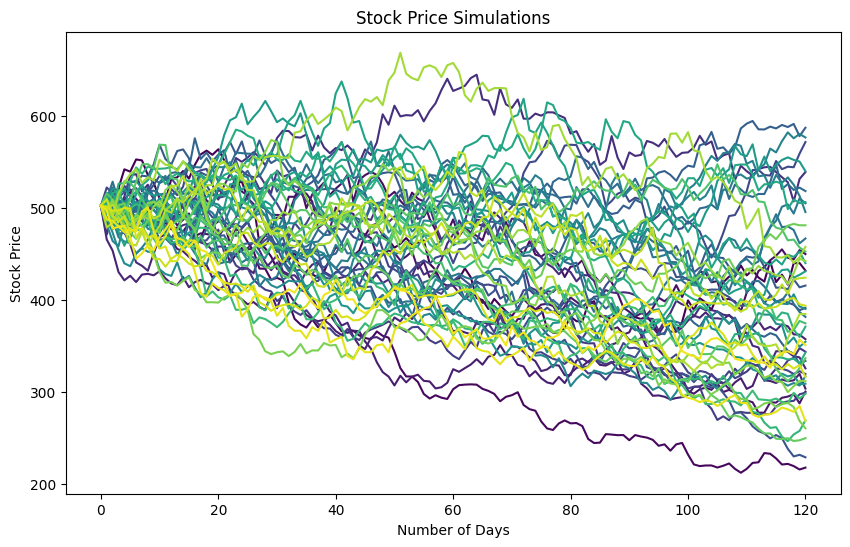

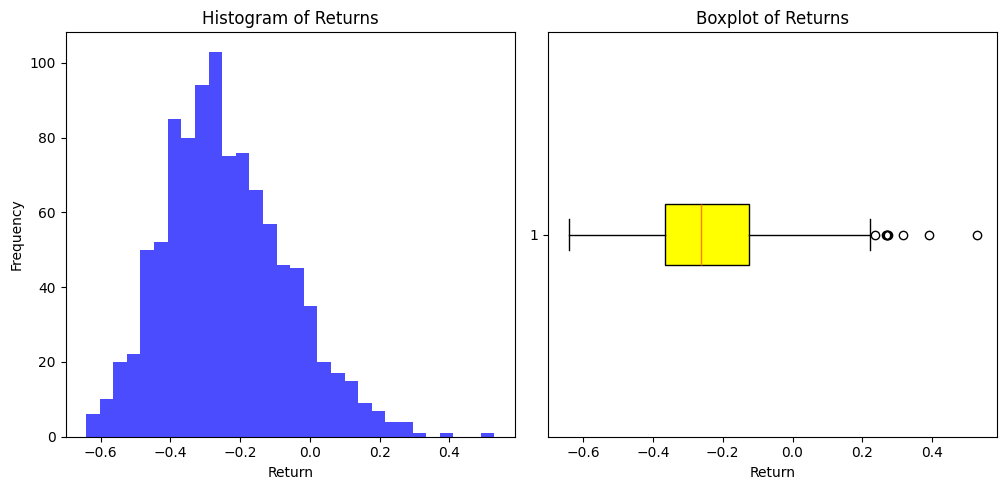

Min: -0.6414720918517667
1st Qu.: -0.36499183060281304
Median: -0.2612593422667124
Mean: -0.23818313990427872
3rd Qu.: -0.12561480777973674
Max: 0.5284863326804646
Probability of achieving at least 12% return: 3.30%
Probability of losing more than 20%: 61.94%


In [35]:
simulation = MonteCarloSimulation(META_xts)
simulation.run_simulation()
simulation.plot_simulations()
simulation.calculate_total_returns()
simulation.plot_return_distribution()
simulation.print_statistics()
simulation.calculate_probabilities()

# simulation = MonteCarloSimulation(AAPL_xts)
# simulation.run_simulation()
# simulation.plot_simulations()
# simulation.calculate_total_returns()
# simulation.plot_return_distribution()
# simulation.print_statistics()
# simulation.calculate_probabilities()

# simulation = MonteCarloSimulation(MSFT_xts)
# simulation.run_simulation()
# simulation.plot_simulations()
# simulation.calculate_total_returns()
# simulation.plot_return_distribution()
# simulation.print_statistics()
# simulation.calculate_probabilities()

# stimulation = MonteCarloSimulation(NVDA_xts)
# simulation.run_simulation()
# simulation.plot_simulations()
# simulation.calculate_total_returns()
# simulation.plot_return_distribution()
# simulation.print_statistics()
# simulation.calculate_probabilities()

# Modeling using statsools

/home/nyanmaruk-cs/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/nyanmaruk-cs/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/nyanmaruk-cs/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/home/nyanmaruk-cs/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position rela

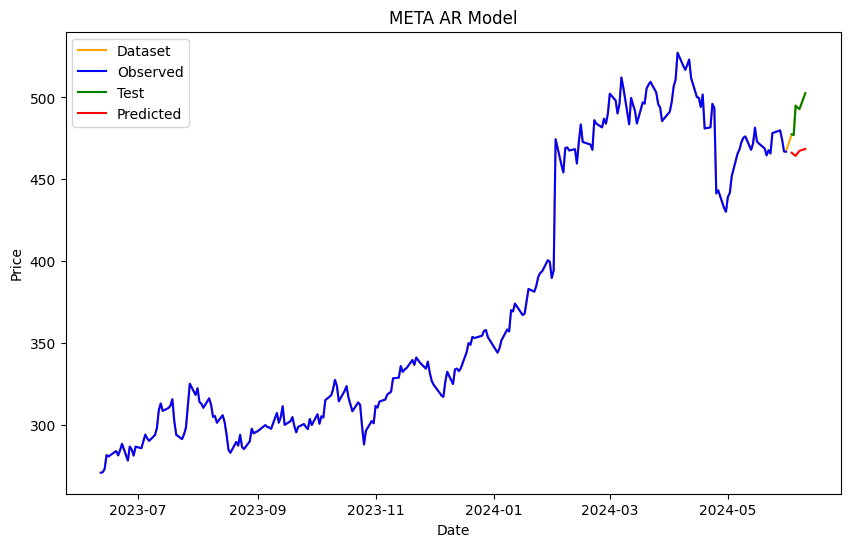

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                  245
Model:              Seas. AutoReg(12)   Log Likelihood                -834.668
Method:               Conditional MLE   S.D. of innovations              8.700
Date:                Tue, 11 Jun 2024   AIC                           1719.336
Time:                        16:08:23   BIC                           1805.612
Sample:                            12   HQIC                          1754.127
                                  245                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.5868      3.293      2.000      0.045       0.132      13.042
s(2,12)          -2.3840      2.800     -0.851      0.395      -7.873       3.105
s(3,12)          -2.5550      2.792     

In [36]:
from statsmodels.tsa.ar_model import AutoReg

def AR_model(data, lags=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)):
    model = AutoReg(data, lags=lags, seasonal=True, period=12)
    model_fit = model.fit()
    return model_fit

def plot_AR_model(data, train, test, model_fit, title):
    plt.figure(figsize=(10, 6))
    #
    plt.plot(data.index, data, label = "Dataset", color = 'orange')
    # plot training data
    plt.plot(train.index, train, label='Observed', color='blue')
    # plot testing data
    plt.plot(test.index, test, label='Test', color='green')
    # plot predicted  test data
    plt.plot(test.index, model_fit.predict(start=len(train), end=len(train) + len(test) - 1), label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


train_size = int(len(META_xts) * 0.98)

META_train, META_test = META_xts[:train_size], META_xts[train_size:]
AAPL_train, AAPL_test = AAPL_xts[:train_size], AAPL_xts[train_size:]
MSFT_train, MSFT_test = MSFT_xts[:train_size], MSFT_xts[train_size:]
NVDA_train, NVDA_test = NVDA_xts[:train_size], NVDA_xts[train_size:]


model_fit = AR_model(META_train, lags=12)
plot_AR_model(META_xts, META_train ,META_test, model_fit, 'META AR Model')
print(model_fit.summary())


In [37]:
# model_fit = AR_model(AAPL_train, lags=12)
# plot_AR_model(AAPL_xts, AAPL_train, AAPL_test, model_fit, 'AAPL AR Model')
# print(model_fit.summary())

In [21]:
# model_fit = AR_model(MSFT_train, lags=12)
# plot_AR_model(MSFT_xts, MSFT_train, MSFT_test, model_fit, 'MSFT AR Model')
# print(model_fit.summary())

In [22]:
# model_fit = AR_model(NVDA_train, lags=12)
# plot_AR_model(NVDA_xts, NVDA_train, NVDA_test, model_fit, 'NVDA AR Model')
# print(model_fit.summary())

# Modeling using sklearn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [25]:
parameteres = {
    'SVR__C': [0.1, 1, 10, 100, 1000],
    'SVR__epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'SVR__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

scaler = StandardScaler()

SVRegressor = SVR()

In [26]:
class TimeSeriesModel:
    def __init__(self, data, n_in=1, n_out=1, dropnan=True, parameteres= None, scaler= None, model= None, title= None):
        self.data = data
        self.dataframe = data['Adj Close']
        self.n_in = n_in
        self.n_out = n_out
        self.dropnan = dropnan
        self.scaler = scaler
        self.parameteres = parameteres
        self.model = model
        self.model_name = model.__class__.__name__
        self.data = self.preprocess_data()
        self.X_train, self.X_test, self.Y_train, self.Y_test = self.split_data()
        self.best_model = self.train_model()
        self.title = title

    def preprocess_data(self):
        ts_diff = np.diff(self.dataframe)
        self.data['Adj_Close_diff1'] = np.append([0], ts_diff)
        dataset = pd.DataFrame(self.data['Adj Close'])

        data = series_to_supervised(dataset, n_in=3, n_out=1)
        return data
    
    def split_data(self):
        X, Y = self.data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], self.data['var1(t)']
        X = X.values
        Y = Y.values
        x = scale(X)
        y = scale(Y)
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)
        return X_train, X_test, Y_train, Y_test
    
    def train_model(self):
        steps = [('scaler', self.scaler), (f'{self.model_name}', self.model)]
        pipeline = Pipeline(steps)

        self.parameteres = {
            'SVR__C': [0.1, 1, 10, 100, 1000],
            'SVR__epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
            'SVR__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
        }

        grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=3)

        grid.fit(self.X_train, self.Y_train)

        print(grid.best_params_)
        return grid
    
    def predict(self):
        pred = self.best_model.predict(self.X_test)
        return pred
    
    def calculate_metrics(self):
        pred = self.predict()
        Y_test = self.Y_test
        MSE = mean_squared_error(Y_test, pred)
        MAPE = mean_absolute_percentage_error(Y_test, pred)
        R2 = r2_score(Y_test, pred)
        print(f"MSE: {MSE}, MAPE: {MAPE}, R2: {R2}")

    def plot_results(self):
        y_pred = self.predict()
        Y_test = self.Y_test
        Y_train = self.Y_train
        size = len(Y_train) + len(Y_test)
        plt.plot(list(range(len(Y_train))), Y_train, label='train', color='blue')
        plt.plot(list(range(len(Y_train), size)), Y_test, label='test', color='green')
        plt.plot(list(range(len(Y_train), size)), y_pred, label='predicted', color='red')
        plt.legend(loc='best')
        plt.title(f'Real vs Predicted values {self.title}')
        plt.show()
   

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.080 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.133 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.719 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.856 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-98.528 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.715 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.534 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.741 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.930 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=-0.106 total time=   0.0

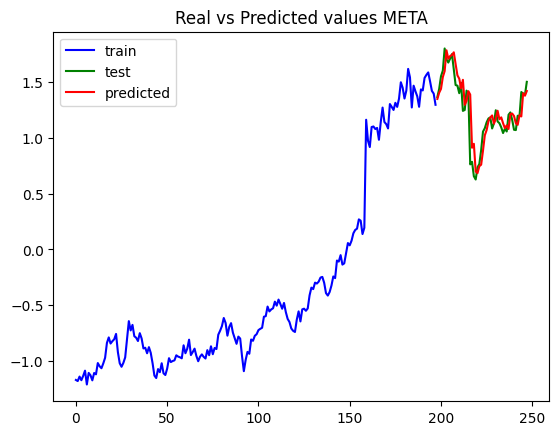

In [27]:
model = TimeSeriesModel(META, n_in=3, n_out=1, dropnan=True, parameteres=parameteres, scaler=scaler, model=SVRegressor, title='META')
model.calculate_metrics()
model.plot_results()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.790 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.638 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.883 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.240 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.805 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.820 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.713 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.939 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.784 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.882 total time=   0.0s
[C

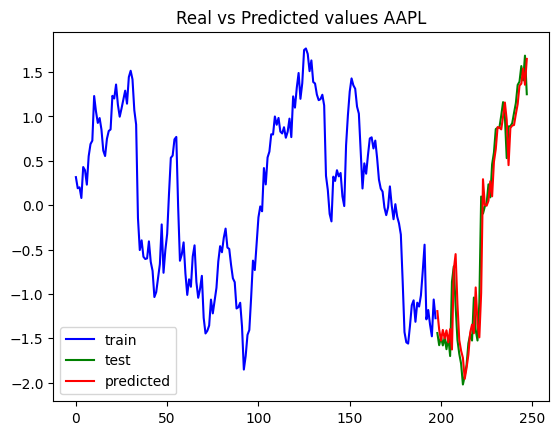

In [28]:
model = TimeSeriesModel(AAPL, n_in=3, n_out=1, dropnan=True, parameteres=parameteres, scaler=scaler, model=SVRegressor, title='AAPL')
model.calculate_metrics()
model.plot_results()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.391 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-2.958 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.930 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.915 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-14.977 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.489 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.657 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.941 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.919 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.548 total time=   0.0s

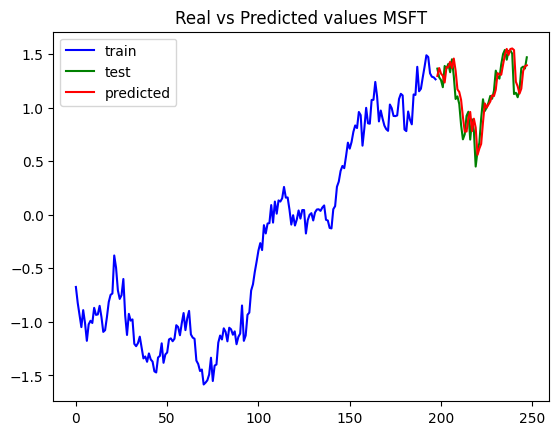

In [29]:
model = TimeSeriesModel(MSFT, n_in=3, n_out=1, dropnan=True, parameteres=parameteres, scaler=scaler, model=SVRegressor, title='MSFT')
model.calculate_metrics()
model.plot_results()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.009 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.629 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-10.903 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.552 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.702 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.790 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.957 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.901 total time=   0.0s

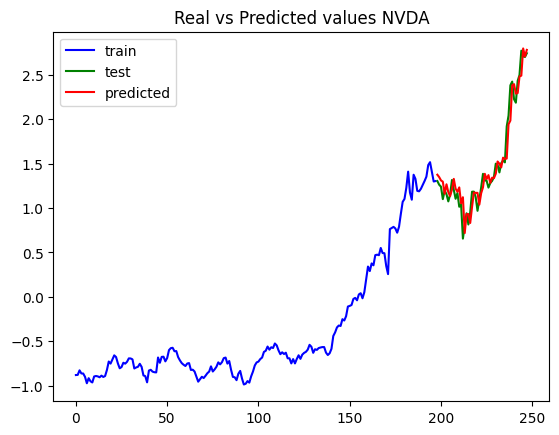

In [30]:
model = TimeSeriesModel(NVDA, n_in=3, n_out=1, dropnan=True, parameteres=parameteres, scaler=scaler, model=SVRegressor, title='NVDA')
model.calculate_metrics()
model.plot_results()